In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/SNN of Biometric Data_Shared Project Folder/Data/static_pressure/dataset1

/content/drive/.shortcut-targets-by-id/1lfrrfq0sYa0AX3_HTxE5mSWBkd4LRjF5/SNN of Biometric Data_Shared Project Folder/Data/static_pressure/dataset1


In [2]:
!pip install heartpy

     |████████████████████████████████| 1.0 MB 5.1 MB/s 


Finding Heart rate using heartpy module

In [3]:
import torch
import glob2
import pandas as pd
import os
import heartpy as hp
F=['dataset1','dataset2','dataset3','dataset4','dataset5','dataset6']
DATADIR='/content/drive/MyDrive/SNN of Biometric Data_Shared Project Folder/Data/static_pressure'
HR=[]
for file in F:
  path=os.path.join(DATADIR,file)
  D=pd.read_csv(path+'/'+'first_row_processed_yaxis.csv',header=None)
  D1=pd.read_csv(path+'/'+'last_row_processed_yaxis.csv',header=None)
  working_data,measures=hp.process(D[0].values,212,calc_freq=True)
  working_data1,measures1=hp.process(D1[0].values,212,calc_freq=True)
  HR.append(measures['bpm'])
  HR.append(measures1['bpm'])

/usr/local/lib/python3.7/dist-packages/heartpy/analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
The max

In [4]:
HR

[82.89345063538613,
 76.24375624375625,
 178.46938775510205,
 86.25267665952892,
 96.62983425414365,
 100.30107526881721,
 109.24315619967794,
 87.8395264715554,
 87.87564766839378,
 84.913217623498,
 83.63180964308076,
 97.72087067861715]

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
import pandas as pd

In [6]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [7]:
D_1=pd.read_csv('D_1.csv',header=None)
Y=pd.read_csv('Y.csv',header=None)
D_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7691,7692,7693,7694,7695,7696,7697,7698,7699,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709,7710,7711,7712,7713,7714,7715,7716,7717,7718,7719,7720,7721,7722,7723,7724,7725,7726,7727,7728,7729,7730
0,2.76550,2.81110,2.81450,2.78990,2.85500,2.87680,2.92170,2.94230,2.98880,2.99720,3.00990,2.95190,3.00600,3.09510,3.16220,3.15380,3.13810,3.18780,3.25520,3.28530,3.24080,3.25280,3.28680,3.31020,3.29550,3.34680,3.34940,3.30530,3.33660,3.38560,3.45470,3.41870,3.35020,3.36210,3.34380,3.26460,3.25820,3.18530,3.20330,3.219200,...,2.842400,2.858800,2.806400,2.81920,2.81460,2.80150,2.84340,2.81980,2.78270,2.76480,2.77840,2.720200,2.709400,2.691100,2.690300,2.657800,2.650400,2.688100,2.667200,2.668200,2.706900,2.674800,2.665400,2.635800,2.631200,2.626800,2.664300,2.626800,2.624000,2.658200,2.719500,2.714100,2.665600,2.59620,2.615100,2.615500,2.64330,2.60700,2.56320,2.54050
1,1.72810,1.77860,1.77220,1.77990,1.86250,1.86560,1.90970,1.91420,1.96120,2.01670,2.01500,1.97690,1.99820,2.10780,2.14300,2.17220,2.20090,2.26430,2.34540,2.35260,2.36350,2.39840,2.44290,2.53410,2.57120,2.68360,2.74920,2.71870,2.77780,2.84700,2.95980,2.96540,3.01260,3.06860,3.12660,3.10220,3.16840,3.17140,3.22080,3.307300,...,3.323000,3.388700,3.397500,3.42050,3.43440,3.43560,3.45690,3.47470,3.46120,3.49020,3.51090,3.496300,3.513900,3.512300,3.502200,3.530000,3.535000,3.597300,3.621900,3.638900,3.681000,3.682300,3.688700,3.694400,3.681000,3.682400,3.726100,3.719800,3.734900,3.761200,3.854100,3.880000,3.883600,3.85900,3.894100,3.914200,3.95540,3.93500,3.89270,3.91150
2,3.52000,3.48630,3.45960,3.46340,3.45540,3.32620,3.30530,3.35820,3.35200,3.33260,3.31040,3.31290,3.18130,3.10610,3.01440,2.98400,2.82580,2.77280,2.82470,2.70260,2.64730,2.59440,2.57860,2.46410,2.39610,2.29820,2.29780,2.21020,2.18470,2.09150,2.03460,1.92200,1.86600,1.78900,1.71330,1.59370,1.56100,1.48670,1.29730,1.290700,...,2.287100,2.287400,2.333500,2.35640,2.48220,2.52760,2.55890,2.57900,2.52950,2.55790,2.57600,2.577100,2.509700,2.514000,2.555600,2.562800,2.554800,2.576300,2.590400,2.577100,2.595600,2.653200,2.688700,2.668900,2.618400,2.669800,2.701100,2.739200,2.701200,2.720100,2.797200,2.820800,2.823500,2.76090,2.787400,2.746200,2.86170,2.86380,2.90400,2.91290
3,2.08140,2.08590,2.02470,1.99880,1.92140,1.80550,1.75320,1.74790,1.70920,1.63860,1.65320,1.62820,1.47280,1.39800,1.32850,1.31140,1.15520,1.12070,1.13070,1.06400,1.01250,0.96891,0.97983,0.90036,0.84566,0.83064,0.88128,0.76918,0.75443,0.72158,0.64468,0.57288,0.49922,0.44263,0.41127,0.32483,0.31985,0.33399,0.16479,0.207730,...,1.585100,1.597300,1.631900,1.64080,1.76760,1.77750,1.77790,1.80780,1.79010,1.83720,1.91690,1.905800,1.888200,1.926000,1.946200,1.921900,1.913200,1.911000,1.892800,1.857300,1.863000,1.892700,1.919400,1.891300,1.873600,1.923600,1.930700,1.959200,1.912900,1.987600,2.116400,2.150900,2.186800,2.16750,2.157200,2.160000,2.20300,2.18380,2.16230,2.13300
4,0.82639,0.81700,0.82990,0.81968,0.79521,0.79321,0.78201,0.77080,0.76667,0.77108,0.76377,0.76056,0.74443,0.72954,0.73203,0.71900,0.71821,0.72278,0.72286,0.74590,0.72648,0.71844,0.71367,0.71395,0.70746,0.71004,0.70496,0.70984,0.71828,0.71892,0.71852,0.72624,0.73762,0.73244,0.72691,0.73193,0.71793,0.71615,0.74696,0.764370,...,0.656830,0.644960,0.629570,0.62499,0.60979,0.60407,0.58844,0.57539,0.56568,0.58127,0.56925,0.562980,0.564920,0.551460,0.546180,0.527390,0.505520,0.492700,0.494460,0.479250,0.486350,0.483830,0.483520,0.471610,0.460310,0.447900,0.439630,0.440100,0.420650,0.416290,0.395990,0.379910,0.383190,0.37824,0.375620,0.378260,0.36518,0.35855,0.36697,0.33737
5,0.83985,0.82884,0.84552,0.85155,0.83299,0.83341,0.82048,0.82116,0.82361,0.81484,0.81463,0.81572,0.80925,0.80712,0.82459,0.82073,0.79849,0.79477,0.78866,0.80833,0.79452,0.78282,0.76956,0.76688,0.75821,0.75338,0.73994,0.74509,0.74286,0.73427,0.73063,0.72470,0.73277,0.70429,0.70065,0.68188,0.66409,0.65470,0.67265,0

In [8]:
X_train=D_1.iloc[:10,:]
Y_train=Y.iloc[:10,0]
X_test=D_1.iloc[10:12,:]
Y_test=Y.iloc[10:12,0]
X_train.shape

(10, 7731)

In [9]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7691,7692,7693,7694,7695,7696,7697,7698,7699,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709,7710,7711,7712,7713,7714,7715,7716,7717,7718,7719,7720,7721,7722,7723,7724,7725,7726,7727,7728,7729,7730
0,2.76550,2.81110,2.81450,2.78990,2.85500,2.87680,2.92170,2.94230,2.98880,2.99720,3.00990,2.95190,3.00600,3.09510,3.16220,3.15380,3.13810,3.18780,3.25520,3.28530,3.24080,3.25280,3.28680,3.31020,3.29550,3.34680,3.34940,3.30530,3.33660,3.38560,3.45470,3.41870,3.35020,3.36210,3.34380,3.26460,3.25820,3.18530,3.20330,3.219200,...,2.84240,2.85880,2.80640,2.81920,2.81460,2.80150,2.84340,2.81980,2.78270,2.76480,2.77840,2.720200,2.709400,2.691100,2.690300,2.657800,2.650400,2.688100,2.667200,2.668200,2.706900,2.674800,2.665400,2.635800,2.631200,2.626800,2.664300,2.626800,2.624000,2.658200,2.719500,2.714100,2.665600,2.59620,2.615100,2.615500,2.64330,2.60700,2.56320,2.54050
1,1.72810,1.77860,1.77220,1.77990,1.86250,1.86560,1.90970,1.91420,1.96120,2.01670,2.01500,1.97690,1.99820,2.10780,2.14300,2.17220,2.20090,2.26430,2.34540,2.35260,2.36350,2.39840,2.44290,2.53410,2.57120,2.68360,2.74920,2.71870,2.77780,2.84700,2.95980,2.96540,3.01260,3.06860,3.12660,3.10220,3.16840,3.17140,3.22080,3.307300,...,3.32300,3.38870,3.39750,3.42050,3.43440,3.43560,3.45690,3.47470,3.46120,3.49020,3.51090,3.496300,3.513900,3.512300,3.502200,3.530000,3.535000,3.597300,3.621900,3.638900,3.681000,3.682300,3.688700,3.694400,3.681000,3.682400,3.726100,3.719800,3.734900,3.761200,3.854100,3.880000,3.883600,3.85900,3.894100,3.914200,3.95540,3.93500,3.89270,3.91150
2,3.52000,3.48630,3.45960,3.46340,3.45540,3.32620,3.30530,3.35820,3.35200,3.33260,3.31040,3.31290,3.18130,3.10610,3.01440,2.98400,2.82580,2.77280,2.82470,2.70260,2.64730,2.59440,2.57860,2.46410,2.39610,2.29820,2.29780,2.21020,2.18470,2.09150,2.03460,1.92200,1.86600,1.78900,1.71330,1.59370,1.56100,1.48670,1.29730,1.290700,...,2.28710,2.28740,2.33350,2.35640,2.48220,2.52760,2.55890,2.57900,2.52950,2.55790,2.57600,2.577100,2.509700,2.514000,2.555600,2.562800,2.554800,2.576300,2.590400,2.577100,2.595600,2.653200,2.688700,2.668900,2.618400,2.669800,2.701100,2.739200,2.701200,2.720100,2.797200,2.820800,2.823500,2.76090,2.787400,2.746200,2.86170,2.86380,2.90400,2.91290
3,2.08140,2.08590,2.02470,1.99880,1.92140,1.80550,1.75320,1.74790,1.70920,1.63860,1.65320,1.62820,1.47280,1.39800,1.32850,1.31140,1.15520,1.12070,1.13070,1.06400,1.01250,0.96891,0.97983,0.90036,0.84566,0.83064,0.88128,0.76918,0.75443,0.72158,0.64468,0.57288,0.49922,0.44263,0.41127,0.32483,0.31985,0.33399,0.16479,0.207730,...,1.58510,1.59730,1.63190,1.64080,1.76760,1.77750,1.77790,1.80780,1.79010,1.83720,1.91690,1.905800,1.888200,1.926000,1.946200,1.921900,1.913200,1.911000,1.892800,1.857300,1.863000,1.892700,1.919400,1.891300,1.873600,1.923600,1.930700,1.959200,1.912900,1.987600,2.116400,2.150900,2.186800,2.16750,2.157200,2.160000,2.20300,2.18380,2.16230,2.13300
4,0.82639,0.81700,0.82990,0.81968,0.79521,0.79321,0.78201,0.77080,0.76667,0.77108,0.76377,0.76056,0.74443,0.72954,0.73203,0.71900,0.71821,0.72278,0.72286,0.74590,0.72648,0.71844,0.71367,0.71395,0.70746,0.71004,0.70496,0.70984,0.71828,0.71892,0.71852,0.72624,0.73762,0.73244,0.72691,0.73193,0.71793,0.71615,0.74696,0.764370,...,0.65683,0.64496,0.62957,0.62499,0.60979,0.60407,0.58844,0.57539,0.56568,0.58127,0.56925,0.562980,0.564920,0.551460,0.546180,0.527390,0.505520,0.492700,0.494460,0.479250,0.486350,0.483830,0.483520,0.471610,0.460310,0.447900,0.439630,0.440100,0.420650,0.416290,0.395990,0.379910,0.383190,0.37824,0.375620,0.378260,0.36518,0.35855,0.36697,0.33737
5,0.83985,0.82884,0.84552,0.85155,0.83299,0.83341,0.82048,0.82116,0.82361,0.81484,0.81463,0.81572,0.80925,0.80712,0.82459,0.82073,0.79849,0.79477,0.78866,0.80833,0.79452,0.78282,0.76956,0.76688,0.75821,0.75338,0.73994,0.74509,0.74286,0.73427,0.73063,0.72470,0.73277,0.70429,0.70065,0.68188,0.66409,0.65470,0.67265,0.665030,...,0.8

In [10]:
X_train.shape[1:]

(7731,)

NN regressive model without specifying input

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
input_size=7731
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])

In [17]:
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(X_train,Y_train,epochs=10,verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 261ms/step - loss: 10487.3623
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 1386114560.0000
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 258956547063808.0000
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 48426001728370900992.0000
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 9056006457256265956458496.0000
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 1693538392632716106765889961984.0000
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 316704002691076035241123203350790144.0000
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: inf
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: inf
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: inf


In [ ]:
#linear_model.predict(X_test)
#linear_model.compile(
    #optimizer=tf.optimizers.Adam(learning_rate=0.1),
    #loss='mean_absolute_error')
history = linear_model.fit(
    X_train, Y_train, 
    epochs=10,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

In [18]:
y_pred= models.evaluate(X_test,Y_test, verbose=0)
y_pred=models.predict(X_test)
y_pred

array([[-7.208410e+27],
       [-7.036116e+27]], dtype=float32)

Shallow Neural Network (no hidden layer)

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [22]:
regressor = Sequential()
regressor.add(Dense(7732, input_dim=7731, kernel_initializer='normal', activation='relu'))
regressor.add(Dense(1, kernel_initializer='normal',activation='linear'))
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.fit(X_train,Y_train, epochs=20, batch_size=2, verbose=2,validation_data=(X_test, Y_test))

Epoch 1/20
5/5 - 2s - loss: 268075.0000 - val_loss: 30786.4297
Epoch 2/20
5/5 - 1s - loss: 22758.1934 - val_loss: 1112.5786
Epoch 3/20
5/5 - 1s - loss: 49911.8164 - val_loss: 765.3153
Epoch 4/20
5/5 - 2s - loss: 21896.2227 - val_loss: 10565.7969
Epoch 5/20
5/5 - 2s - loss: 11610.1084 - val_loss: 1174.0476
Epoch 6/20
5/5 - 2s - loss: 11392.9883 - val_loss: 44.5681
Epoch 7/20
5/5 - 2s - loss: 6349.4365 - val_loss: 2836.5054
Epoch 8/20
5/5 - 2s - loss: 3171.4766 - val_loss: 2774.3218
Epoch 9/20
5/5 - 1s - loss: 807.7057 - val_loss: 982.0887
Epoch 10/20
5/5 - 1s - loss: 760.1085 - val_loss: 505.5793
Epoch 11/20
5/5 - 1s - loss: 353.9023 - val_loss: 828.4422
Epoch 12/20
5/5 - 1s - loss: 210.7796 - val_loss: 1114.6257
Epoch 13/20
5/5 - 1s - loss: 164.4103 - val_loss: 719.5197
Epoch 14/20
5/5 - 1s - loss: 117.4242 - val_loss: 641.6796
Epoch 15/20
5/5 - 1s - loss: 90.1917 - val_loss: 803.9031
Epoch 16/20
5/5 - 1s - loss: 54.9199 - val_loss: 790.4863
Epoch 17/20
5/5 - 1s - loss: 53.0571 - val_l

In [24]:
Y_test

10    83.631810
11    97.720871
Name: 0, dtype: float64

In [28]:
#test_pred=regressor.predict(X_test)
#test_pred
mean_absolute_error(Y_test,test_pred)
mean_squared_error(Y_test,test_pred)

717.1979875923757

Neural Network (with 1 hidden layer) 

In [32]:
regressor1 = Sequential()
regressor1.add(Dense(7732, input_dim=7731, kernel_initializer='normal', activation='relu'))
regressor1.add(Dense(7731, kernel_initializer='normal', activation='relu'))
regressor1.add(Dense(1, kernel_initializer='normal'))

In [33]:
regressor1.compile(loss='mean_squared_error', optimizer='adam')
regressor1.fit(X_train,Y_train, epochs=10, batch_size=1, verbose=2,validation_data=(X_test, Y_test))

Epoch 1/10
10/10 - 6s - loss: 1342208.7500 - val_loss: 105697.4688
Epoch 2/10
10/10 - 5s - loss: 212066.4062 - val_loss: 32607.4863
Epoch 3/10
10/10 - 5s - loss: 82542.5625 - val_loss: 21813.2188
Epoch 4/10
10/10 - 4s - loss: 68630.9141 - val_loss: 1631.7268
Epoch 5/10
10/10 - 5s - loss: 13064.1875 - val_loss: 6562.7148
Epoch 6/10
10/10 - 5s - loss: 19896.1055 - val_loss: 5228.6147
Epoch 7/10
10/10 - 5s - loss: 6461.9727 - val_loss: 235.1963
Epoch 8/10
10/10 - 5s - loss: 3794.4067 - val_loss: 7475.7715
Epoch 9/10
10/10 - 5s - loss: 9094.6885 - val_loss: 1265.8981
Epoch 10/10
10/10 - 5s - loss: 1656.9597 - val_loss: 2510.6748


In [34]:
#Y_test1=pd.DataFrame(Y_test.values,columns=['0'])
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7691,7692,7693,7694,7695,7696,7697,7698,7699,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709,7710,7711,7712,7713,7714,7715,7716,7717,7718,7719,7720,7721,7722,7723,7724,7725,7726,7727,7728,7729,7730
10,0.39158,0.41014,0.41582,0.43482,0.42808,0.43387,0.40826,0.39794,0.40625,0.39754,0.40336,0.38267,0.36680,0.34771,0.33844,0.33920,0.34221,0.35049,0.33152,0.32593,0.30837,0.31651,0.32547,0.33842,0.32853,0.31863,0.31823,0.30229,0.30712,0.31319,0.30731,0.31017,0.30298,0.30495,0.29995,0.31193,0.31185,0.31691,0.32537,0.32605,...,-0.047489,-0.073046,-0.076663,-0.11301,-0.13187,-0.16046,-0.17574,-0.19968,-0.22294,-0.24376,-0.25629,-0.27233,-0.28149,-0.29713,-0.29970,-0.33342,-0.33294,-0.33891,-0.34296,-0.35352,-0.39067,-0.40701,-0.41021,-0.44111,-0.44327,-0.45696,-0.46061,-0.47211,-0.46791,-0.45697,-0.45810,-0.4677,-0.47434,-0.49298,-0.52613,-0.53713,-0.53642,-0.53675,-0.53481,-0.52096
11,0.54699,0.54981,0.54745,0.55094,0.54640,0.54559,0.54811,0.55728,0.57962,0.57784,0.58664,0.58774,0.58524,0.57880,0.56309,0.57088,0.58064,0.57624,0.57956,0.58296,0.57833,0.57680,0.59125,0.61186,0.62138,0.61580,0.61865,0.61210,0.62128,0.61519,0.60872,0.60300,0.59023,0.58864,0.59095,0.59340,0.59391,0.58531,0.61020,0.60444,...,-0.191250,-0.202960,-0.209610,-0.23670,-0.24160,-0.25995,-0.26633,-0.27221,-0.28218,-0.28406,-0.28557,-0.28924,-0.29880,-0.28964,-0.28025,-0.29385,-0.28440,-0.28384,-0.28306,-0.28578,-0.29587,-0.30630,-0.30934,-0.31196,-0.31477,-0.31795,-0.32318,-0.32912,-0.31592,-0.30103,-0.30564,-0.3096,-0.31537,-0.32731,-0.34833,-0.33115,-0.31204,-0.30380,-0.27464,-0.27174


In [39]:
test_pred=regressor1.predict(X_test)
test_pred
mean_absolute_error(Y_test,test_pred)
mean_squared_error(Y_test,test_pred)

2510.6730204348414

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

Peak detection algorithm (Manual method)

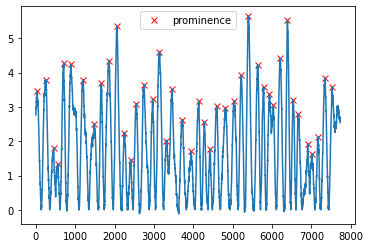

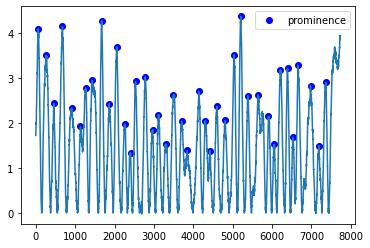

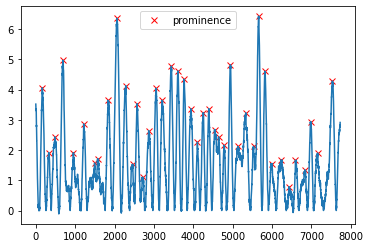

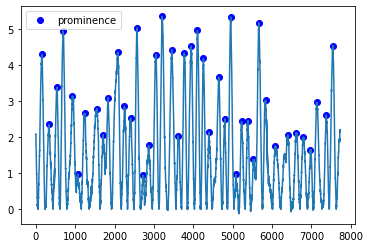

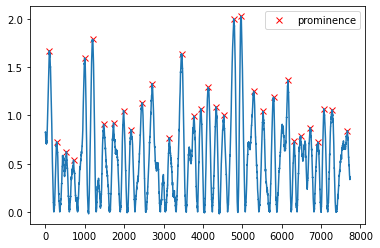

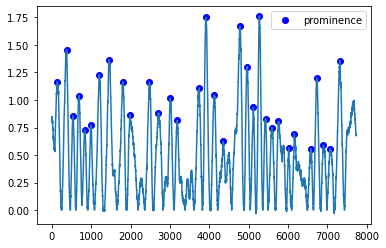

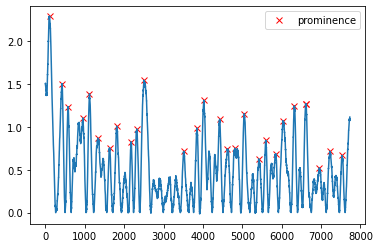

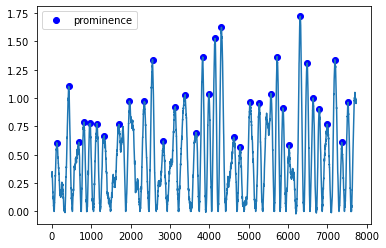

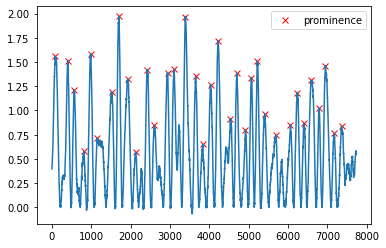

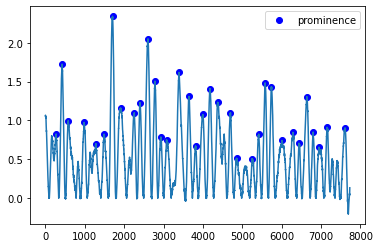

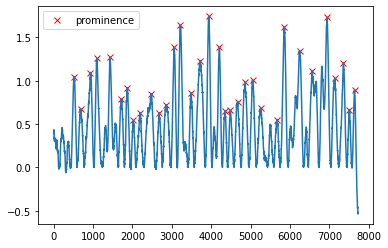

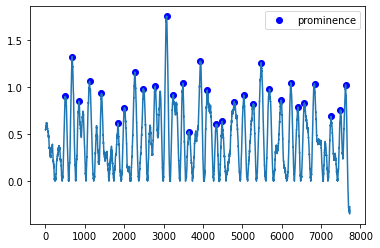

In [ ]:
import torch
import glob2
import pandas as pd
import os
F=['dataset1','dataset2','dataset3','dataset4','dataset5','dataset6']
DATADIR='/content/drive/MyDrive/SNN of Biometric Data_Shared Project Folder/Data/static_pressure'
HR=[]
for file in F:
  path=os.path.join(DATADIR,file)
  D_Y1=pd.read_csv(path+'/'+'first_row_processed_yaxis.csv',header=None)
  D_Y2=pd.read_csv(path+'/'+'last_row_processed_yaxis.csv',header=None)
  D_X1=pd.read_csv(path+'/'+'first_row_xaxis.csv',header=None)
  D_X2=pd.read_csv(path+'/'+'last_row_xaxis.csv',header=None)
  peaks, _ = find_peaks(D_Y1[0], prominence=0.5) #0.5 best prominence for our case
  plt.subplot(1,1,1)
  plt.plot(peaks, D_Y1[0][peaks], "xr"); plt.plot(D_Y1[0]); plt.legend(['prominence'])
  plt.show()
  peaks1, _ = find_peaks(D_Y2[0], prominence=0.5) #0.5 best prominence for our case
  plt.subplot(1,1,1)
  plt.plot(peaks1, D_Y2[0][peaks1], "ob"); plt.plot(D_Y2[0]); plt.legend(['prominence'])
  plt.show()
  HR.append(len(peaks)/(D_X1[0][7730]-D_X1[0][0]))
  HR.append(len(peaks1)/(D_X2[0][7730]-D_X2[0][0]))

In [ ]:
#D_X1
for i in range(len(HR)):
  HR[i]=HR[i]*60
HR


[184.96919749058458,
 171.757742310538,
 180.56516897890398,
 184.96987633442555,
 140.9289123737787,
 140.92942958813376,
 123.31279832705636,
 154.1415636120213,
 149.7369693971399,
 149.7375189373921,
 145.33294088545932,
 136.52538491350455]

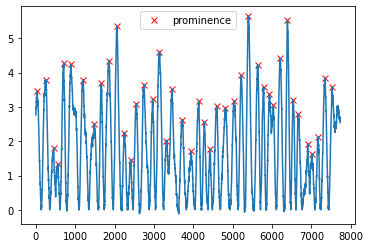

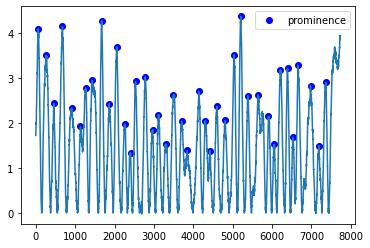

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks
peaks, _ = find_peaks(D_A1[0], prominence=0.5) #0.5 best prominence for our case
plt.subplot(1,1,1)
plt.plot(peaks, D_A1[0][peaks], "xr"); plt.plot(D_A1[0]); plt.legend(['prominence'])
plt.show()

import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks
peaks1, _ = find_peaks(D_A2[0], prominence=0.5) #0.5 best prominence for our case
plt.subplot(1,1,1)
plt.plot(peaks1, D_A2[0][peaks1], "ob"); plt.plot(D_A2[0]); plt.legend(['prominence'])
plt.show()

In [ ]:
D

,0
0,0.39158
1,0.41014
2,0.41582
3,0.43482
4,0.42808
...,...
7726,-0.53713
7727,-0.53642
7728,-0.53675
7729,-0.53481


SNN Architecture

In [ ]:
#!pip install git+https://github.com/BindsNET/bindsnet.git
from bindsnet.network import Network
network = Network()

In [ ]:
import torch
import matplotlib.pyplot as plt
from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.analysis.plotting import plot_spikes, plot_voltages
time=500
source_layer=Input(n=7731)
target_layer=LIFNodes(n=1)
network.add_layer(
    layer=source_layer, name="Input"
)
network.add_layer(
    layer=target_layer, name="Output"
)
# Create connection between input and output layers.
forward_connection = Connection(
    source=source_layer,
    target=target_layer,
    w=0.05 + 0.1 * torch.randn(source_layer.n, target_layer.n),  # Normal(0.05, 0.01) weights.
)
network.add_connection(
    connection=forward_connection, source="Input", target="Output"
)
# Create recurrent connection in output layer.
recurrent_connection = Connection(
    source=target_layer,
    target=target_layer,
    w=0.025 * (torch.eye(target_layer.n) - 1), # Small, inhibitory "competitive" weights.
)
network.add_connection(
    connection=recurrent_connection, source="Output", target="Output"
)
input_data=D[0]
inputs={"Input":input_data}
# Simulate network on input data.
network.run(inputs=inputs, time=time)
# Retrieve and plot simulation spike, voltage data from monitors.
spikes = {
    "Input": source_monitor.get("s"), "Output": target_monitor.get("s")
}
voltages = {"Output": target_monitor.get("v")}
plt.ioff()
plot_spikes(spikes)
plot_voltages(voltages, plot_type="line")
plt.show()

TypeError: ignored

RNN based

Inflation Data

In [ ]:
cd /content/drive/MyDrive/SNN of Biometric Data_Shared Project Folder/Data/Inflation Data

/content/drive/.shortcut-targets-by-id/1lfrrfq0sYa0AX3_HTxE5mSWBkd4LRjF5/SNN of Biometric Data_Shared Project Folder/Data/Inflation Data


In [ ]:
import pandas as pd
#DF=pd.read_csv('p1.csv',header=None,delim_whitespace=False)
#DF=pd.read_csv('p2.csv',header=None,delim_whitespace=False)
DF=pd.read_csv('p3.csv',header=None,delim_whitespace=False)
DF.drop(columns=[0,2,3],axis=1,inplace=True)
DF.columns=['X-axis','Y-axis']
DF

,X-axis,Y-axis
0,0.000,-21.434001
1,0.025,-21.251813
2,0.050,-20.770129
3,0.075,-19.726260
4,0.100,-17.873752
...,...,...
362,9.050,133.032334
363,9.075,135.471261
364,9.100,137.607121
365,9.125,139.318461


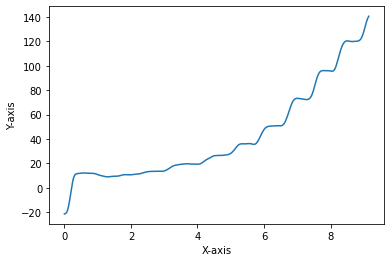

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.lineplot(x='X-axis',y='Y-axis',data=DF)
plt.show()

In [ ]:
import os
array2D=[]
with open("20 July 2018.txt","r") as f:
    i=0
    for line in f.readlines():
        if (i%10)!=0:  
            array2D.append(line.split(''))
            i+=1
        else:
            loaded_tensor = torch.tensor(array2D)
            break
print(loaded_tensor)

tensor([])


In [ ]:

fin=[]
import numpy as np
with open('20 July 2018.txt') as f:
    triplets=f.readlines()
    i=0
    res=[]
    while i<=50: 
        s=' '
        for num in triplets[i].strip():
            if num!=' ':
                s+=num
            else:
                res.append(int(s,base=10))
                s=' '
        res.append(s[1:])
        fin.append(res)
        res=[]
        i+=1
        #res.append(triplets[i].strip())
        #triplets[i]=triplets[i].split(' ')
print(fin)
#A=np.array(triplets, dtype=np.uint8)

[[41, 0, 0, 22, 0, 1, 0, 1, 207, '624'], [1, 1, 1, 1, 1, 1, 1, 4, 1, '2'], [25, 1, 1, 228, 2, 63, 1, 92, 1, '35'], [1, 1, 1, 1, 1, 4, 2, 195, 1, '53'], [1, 4, 1, 1, 1, 1, 1, 88, 1, '4'], [3, 1, 1, 92, 1, 40, 1, 1, 13, '18'], [1, 1, 1, 15, 1, 4, 1, 2, 4, '4'], [1, 1, 35, 263, 1, 90, 10, 1, 23, '6'], [1, 1, 77, 3, 1, 2, 11, 3, 174, '25'], [1, 5, 1, 2, 110, 1, 5, 2, 1, '1'], [''], [35, 0, 0, 1, 1, 1, 0, 1, 202, '651'], [1, 1, 2, 22, 5, 1, 1, 3, 1, '2'], [28, 1, 1, 256, 15, 52, 1, 113, 1, '35'], [1, 1, 1, 1, 1, 11, 1, 208, 1, '46'], [1, 3, 1, 1, 1, 1, 1, 141, 5, '4'], [1, 1, 1, 121, 1, 39, 1, 1, 14, '23'], [3, 1, 1, 62, 1, 7, 1, 5, 10, '25'], [1, 1, 28, 281, 1, 85, 52, 6, 23, '28'], [1, 1, 56, 1, 1, 1, 22, 36, 117, '32'], [1, 1, 1, 16, 89, 1, 4, 1, 38, '1'], [''], [41, 0, 1, 1, 0, 0, 1, 1, 172, '673'], [1, 1, 1, 9, 1, 1, 1, 3, 1, '2'], [55, 1, 1, 262, 2, 67, 1, 78, 2, '35'], [1, 1, 1, 1, 1, 44, 19, 164, 1, '34'], [1, 4, 1, 1, 1, 1, 1, 128, 5, '7'], [1, 1, 1, 65, 1, 32, 1, 1, 15, '20'], [1,

In [ ]:
for li in fin:
    if li==['']:
        fin.remove(li)
    else:
        li[-1]=int(li[-1])
print(len(fin))

47


In [ ]:
print(res)

NameError: ignored